# Lab 18 - Hierarchical Clustering
## Lecture 18 

In [3]:
data = iris
data = data[,-which(colnames(data)=="Species")]

In [4]:
head(data)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


In [5]:
?hclust

hclust {stats},R Documentation
d,a dissimilarity structure as produced by dist.
method,"the agglomeration method to be used. This should be (an unambiguous abbreviation of) one of ""ward.D"", ""ward.D2"", ""single"", ""complete"", ""average"" (= UPGMA), ""mcquitty"" (= WPGMA), ""median"" (= WPGMC) or ""centroid"" (= UPGMC)."
members,NULL or a vector with length size of d. See the ‘Details’ section.
x,an object of the type produced by hclust.
hang,The fraction of the plot height by which labels should hang below the rest of the plot. A negative value will cause the labels to hang down from 0.
check,"logical indicating if the x object should be checked for validity. This check is not necessary when x is known to be valid such as when it is the direct result of hclust(). The default is check=TRUE, as invalid inputs may crash R due to memory violation in the internal C plotting code."
labels,A character vector of labels for the leaves of the tree. By default the row names or row numbers of the original data are used. If labels = FALSE no labels at all are plotted.
"axes, frame.plot, ann",logical flags as in plot.default.
"main, sub, xlab, ylab",character strings for title. sub and xlab have a non-NULL default when there's a tree$call.
...,"Further graphical arguments. E.g., cex controls the size of the labels (if plotted) in the same way as text."


In [6]:
?dist

dist {stats},R Documentation
x,"a numeric matrix, data frame or ""dist"" object."
method,"the distance measure to be used. This must be one of ""euclidean"", ""maximum"", ""manhattan"", ""canberra"", ""binary"" or ""minkowski"". Any unambiguous substring can be given."
diag,logical value indicating whether the diagonal of the distance matrix should be printed by print.dist.
upper,logical value indicating whether the upper triangle of the distance matrix should be printed by print.dist.
p,The power of the Minkowski distance.
m,"An object with distance information to be converted to a ""dist"" object. For the default method, a ""dist"" object, or a matrix (of distances) or an object which can be coerced to such a matrix using as.matrix(). (Only the lower triangle of the matrix is used, the rest is ignored)."
"digits, justify",passed to format inside of print().
"right, ...","further arguments, passed to other methods."
Size,"integer, the number of observations in the dataset."
Labels,"optionally, contains the labels, if any, of the observations of the dataset."


In [7]:
D = dist(as.matrix(data))

In [9]:
class(D)

[1] "dist"

In [11]:
D_mat = as.matrix(D)
dim(D_mat)

[1] 150 150

In [12]:
D_mat[1:5,1:5]

,1,2,3,4,5
1,0.0000000,0.5385165,0.509902,0.6480741,0.1414214
2,0.5385165,0.0000000,0.300000,0.3316625,0.6082763
3,0.5099020,0.3000000,0.000000,0.2449490,0.5099020
4,0.6480741,0.3316625,0.244949,0.0000000,0.6480741
5,0.1414214,0.6082763,0.509902,0.6480741,0.0000000


In [15]:
all(D - t(D) == 0)

[1] TRUE

In [17]:
hc = hclust(D,method="average")

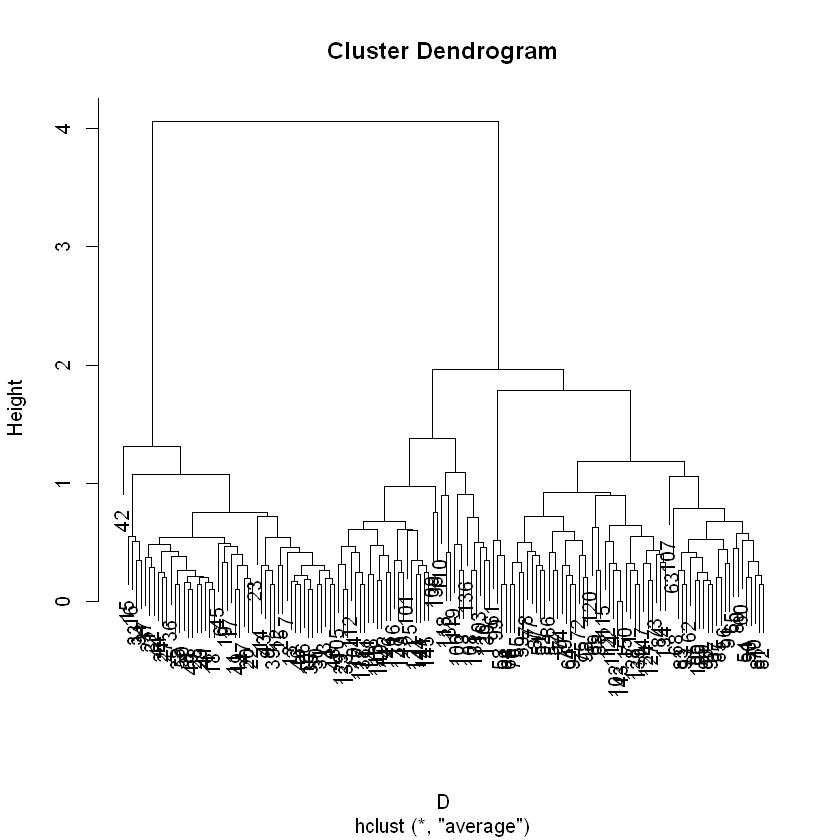

In [18]:
plot(hc)

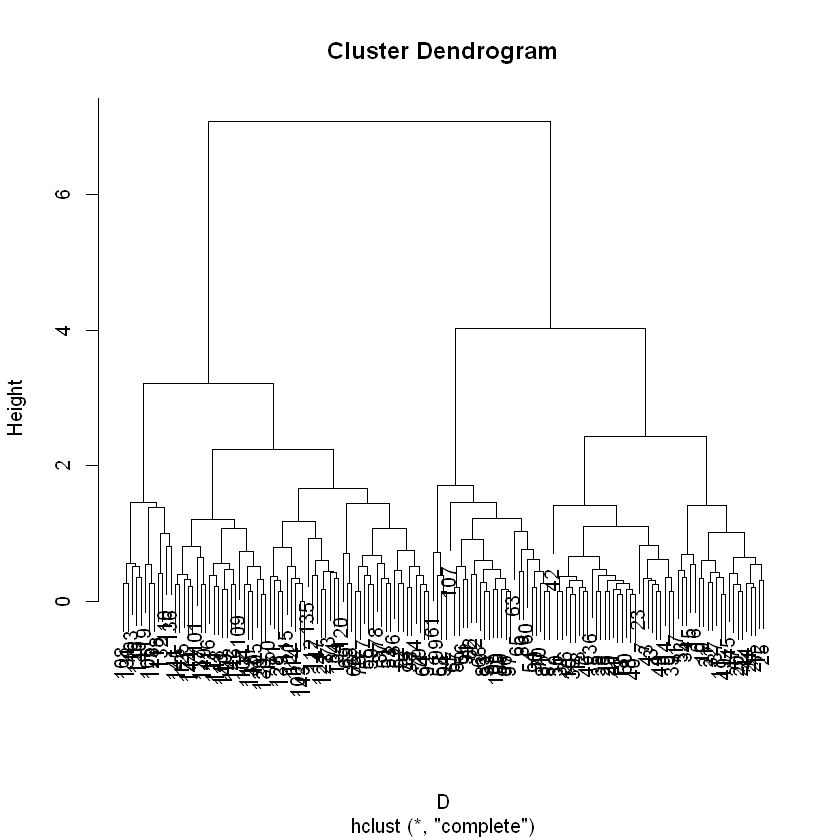

In [19]:
hc = hclust(D,method="complete")
plot(hc)

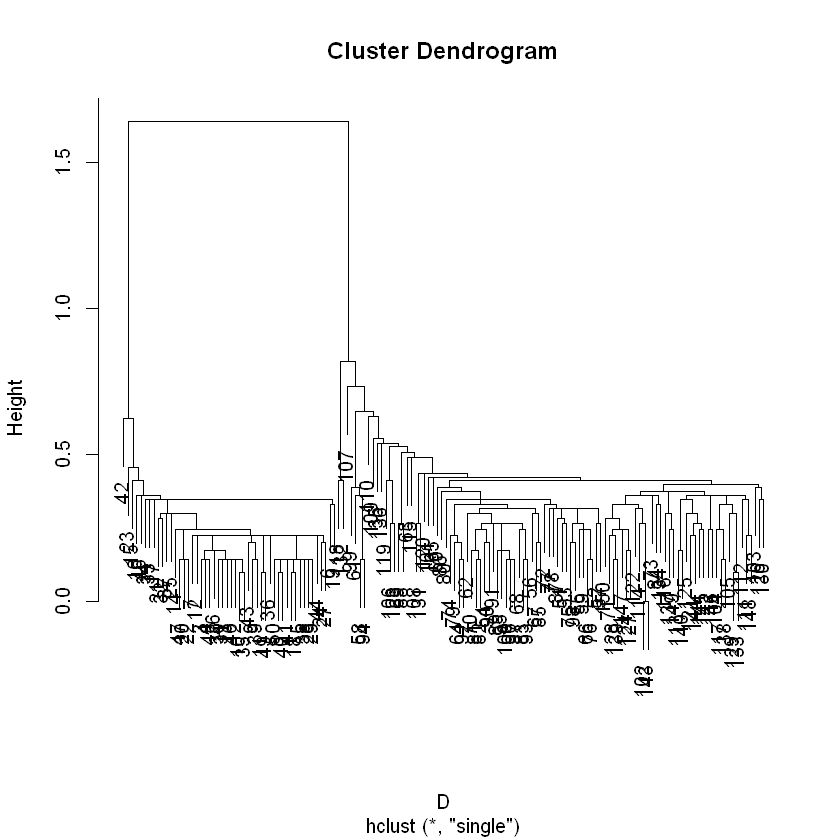

In [20]:
hc = hclust(D,method="single")
plot(hc)

In [21]:
?cutree

cutree {stats},R Documentation
tree,"a tree as produced by hclust. cutree() only expects a list with components merge, height, and labels, of appropriate content each."
k,an integer scalar or vector with the desired number of groups
h,numeric scalar or vector with heights where the tree should be cut.


In [22]:
hc.cut = cutree(hc,h=.5)

In [23]:
hc.cut

[1]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [26]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1
 [51]  3  3  3  3  3  3  3  4  3  3  4  3  3  3  3  3  3  3  5  3  3  3  3  3  3
 [76]  3  3  3  3  3  3  3  3  3  3  3  3  5  3  3  3  3  3  4  3  3  3  3  4  3
[101]  3  3  3  3  3  6  7  3  8  9  3  3  3  3  3  3  3 10  6  3  3  3  6  3  3
[126]  3  3  3  3  3  3 10  3  3 11 12  3  3  3  3  3  3  3  3  3  3  3  3  3  3

In [24]:
table(hc.cut)

hc.cut
 1  2  3  4  5  6  7  8  9 10 11 12 
49  1 84  4  2  3  1  1  1  2  1  1 

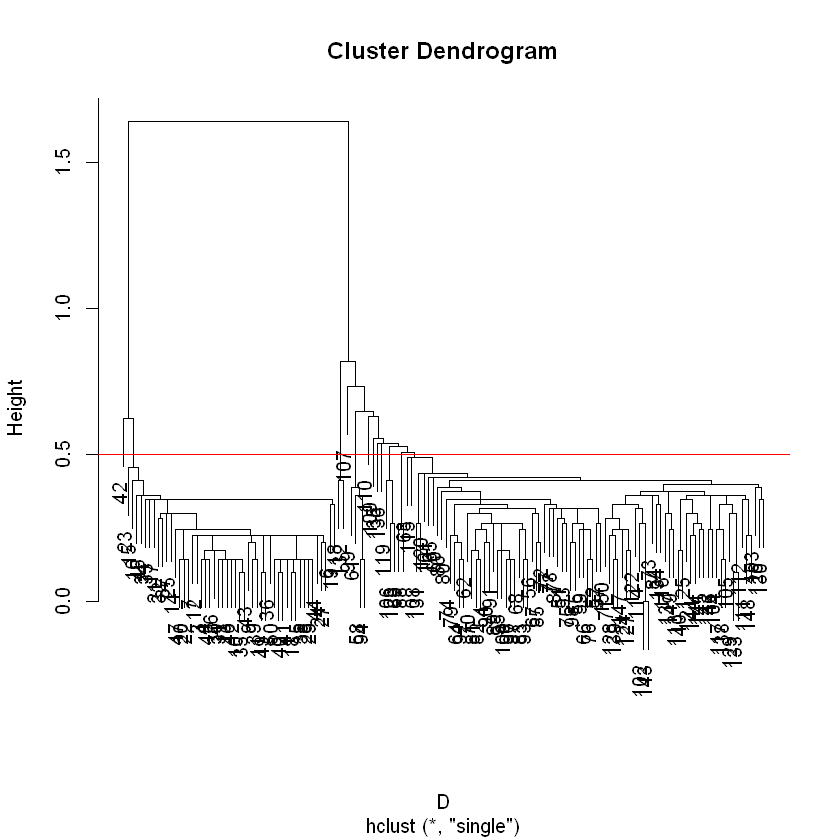

In [26]:
plot(hc);abline(h=.5,col='red')

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

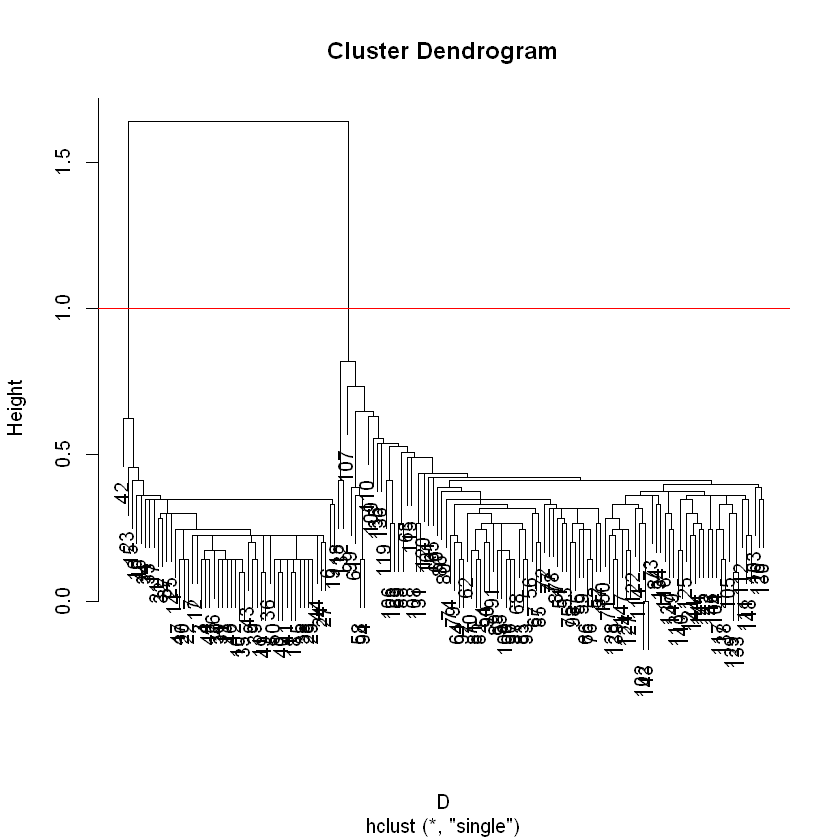

In [30]:
cutree(hc,h=1)
plot(hc);abline(h=1,col='red')

In [32]:
clusts = cutree(hc,k=3)
clusts

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

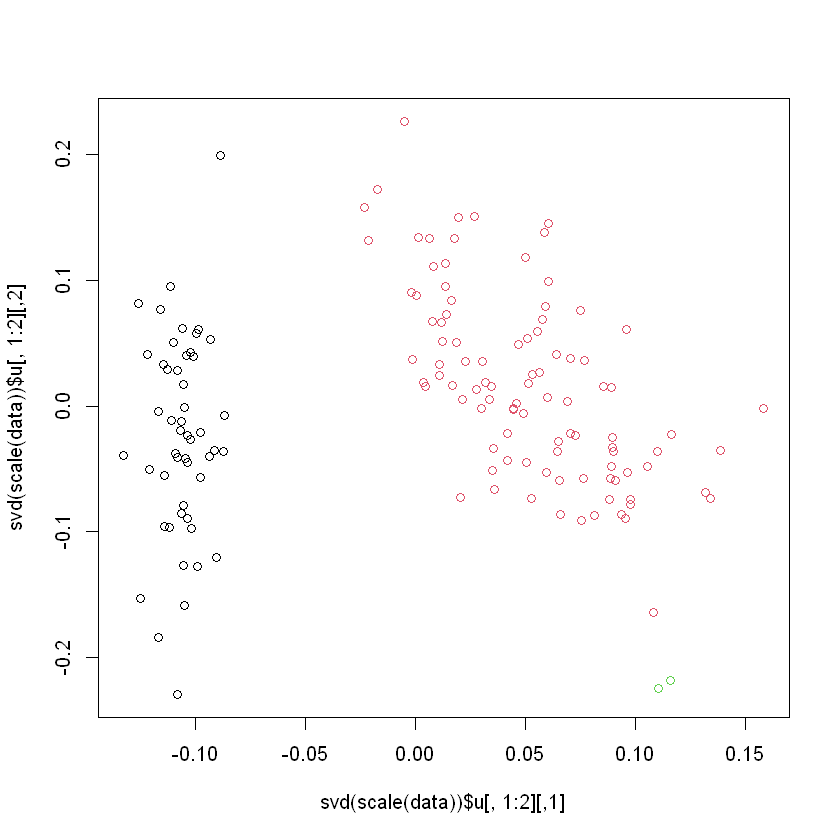

In [33]:
plot(svd(scale(data))$u[,1:2],col=clusts)

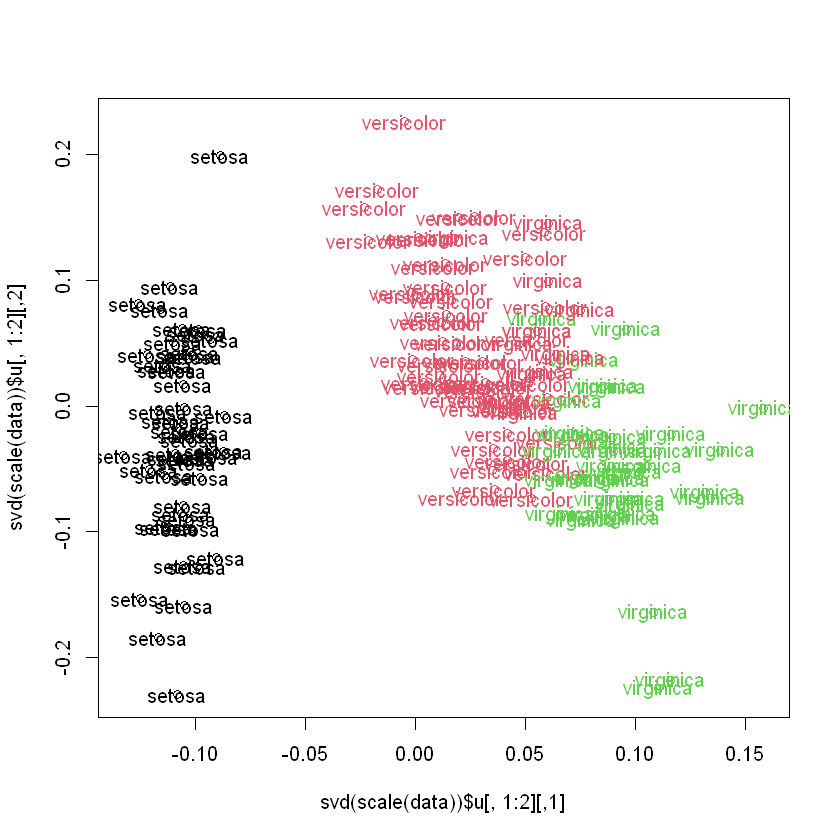

In [37]:
hc = hclust(D,method="average")
clusts = cutree(hc,k=3)
plot(svd(scale(data))$u[,1:2],col=clusts)
text(svd(scale(data))$u[,1:2],label=iris$Species,col=clusts)

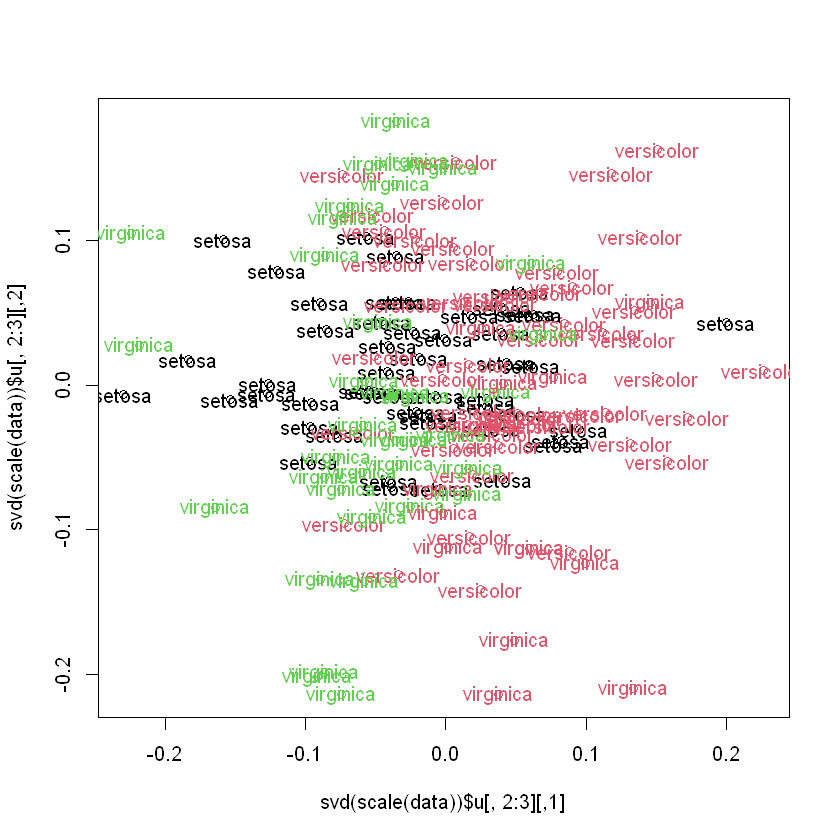

In [38]:
plot(svd(scale(data))$u[,2:3],col=clusts)
text(svd(scale(data))$u[,2:3],label=iris$Species,col=clusts)